## Подсчет объектов

**Erode + dilate**

Количество цилиндров на изображении: 9


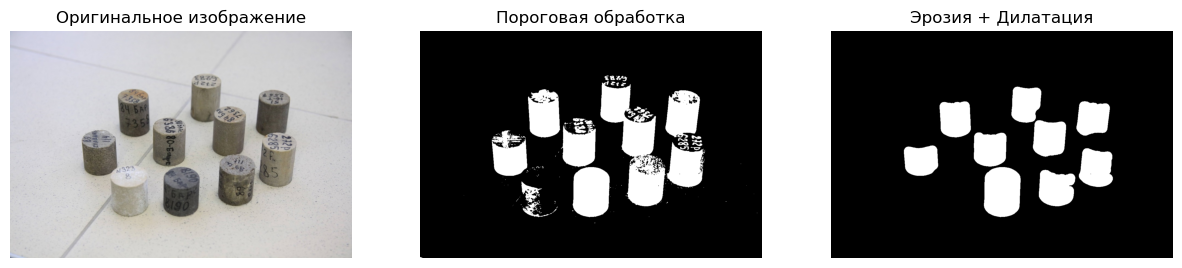

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests

# Загрузка изображения стола для тенниса
url_cores = 'https://github.com/aleksandrbogdanovmsu/comp_vision_classes/blob/main/HW3%20-%20Count%20objects/count_cylindres.jpg?raw=true'
response = requests.get(url_cores)
img = cv.imdecode(np.frombuffer(response.content, np.uint8), cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Применение пороговой обработки
_, thresh = cv.threshold(gray, 0, 225, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Создание структурного элемента (ядро) для морфологических операций
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (35, 35)) 

# Применение эрозии для разделения объектов
eroded = cv.erode(thresh, kernel, iterations=1)

# Применение дилатации для восстановления формы объектов
dilated = cv.dilate(eroded, kernel, iterations=1)

# Вычисление связанных компонентов
num_labels, markers = cv.connectedComponents(dilated)


print(f"Количество цилиндров на изображении: {num_labels - 1}")


plt.figure(figsize=(15, 6))


plt.subplot(1, 3, 1)
plt.title("Оригинальное изображение")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Пороговая обработка")
plt.imshow(thresh, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Эрозия + Дилатация")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.show()


**C выравниванием гистограммы - CLAHE**

Количество цилиндров на изображении: 10


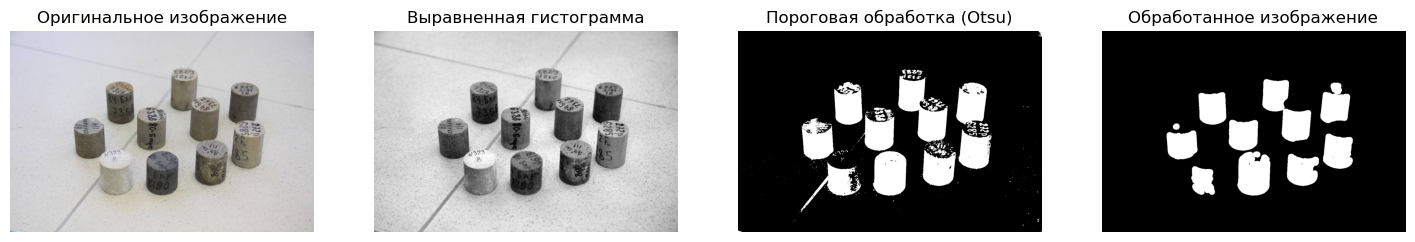

In [169]:
# с выравниванием гистограммы - CLAHE


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Выравнивание гистограммы для повышения контраста
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
equalized = clahe.apply(gray)

# Применение пороговой обработки с Otsu
_, thresh_otsu = cv.threshold(equalized, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25, 25))

eroded = cv.erode(thresh_otsu, kernel, iterations=1)
dilated = cv.dilate(eroded, kernel, iterations=1)

num_labels, markers = cv.connectedComponents(dilated)

print(f"Количество цилиндров на изображении: {num_labels - 1}") 


plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Оригинальное изображение")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Выравненная гистограмма")
plt.imshow(equalized, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Пороговая обработка (Otsu)")
plt.imshow(thresh_otsu, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Обработанное изображение")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.show()


**Find Contours**

Количество цилиндров на изображении: 7


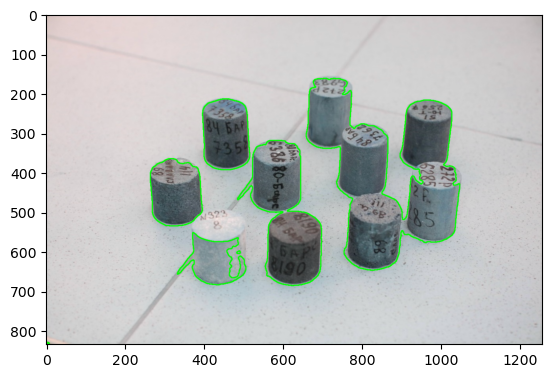

In [20]:


# Преобразование в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия для устранения шума
blurred = cv2.GaussianBlur(gray, (11,11), 4)

# Пороговая обработка
_, threshold = cv2.threshold(blurred, 170, 200, cv2.THRESH_BINARY_INV)

# Поиск контуров
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров на изображении
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Подсчет объектов
cylinder_count = len(contours)
print(f"Количество цилиндров на изображении: {cylinder_count}")

# Отображение результата
plt.imshow(output_image)

